In [1]:
#Import libraries
import urllib.request
from math import log
import re
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load and process data
poems_url_en = 'https://www.gutenberg.org/cache/epub/1322/pg1322.txt'
poems_url_ar = 'https://drive.google.com/uc?id=1CUxPJtFK1vqK4epiEN-zwog4JRV4Dn5z'
poems_en_text = urllib.request.urlopen(poems_url_en)
poems_en_text = poems_en_text.read()
poems_en_text = poems_en_text.decode("utf-8")
poems_ar_text = urllib.request.urlopen(poems_url_ar)
poems_ar_text = poems_ar_text.read()
poems_ar_text = poems_ar_text.decode("utf-8")

In [3]:
#English poems
#Tokenization
en_tokenized = poems_en_text.split(' ')
#Normalize text
filter_out = [""]
normalized_en = [w.lower() for w in en_tokenized if w not in filter_out]
print(len(normalized_en))
#Get most frequent words
freq_en = Counter(normalized_en)
freq_en.most_common(10)

124058


[('the', 9806),
 ('and', 5164),
 ('of', 4254),
 ('i', 2748),
 ('to', 2143),
 ('in', 1848),
 ('a', 1254),
 ('with', 1233),
 ('you', 1223),
 ('is', 1072)]

In [4]:
#Zipf's law English
sns.set_theme(style="darkgrid")
#Create dataframe to match each word to its frequency
df_en = pd.DataFrame.from_records(list(dict(Counter(normalized_en)).items()), columns=['word','frequency'])
print(df_en)
#Sort values to rank them
df_en = df_en.sort_values(by=['frequency'], ascending=False)
df_en['rank'] = list(range(1, len(df_en) + 1))
print(df_en)

                           word  frequency
0                          ﻿the          1
1                       project         67
2                     gutenberg         20
3                         ebook          8
4                            of       4254
...                         ...        ...
24837  gutenberg™,\r\nincluding          1
24838                   ebooks,          1
24839           to\r\nsubscribe          1
24840                newsletter          1
24841       ebooks.\r\n\r\n\r\n          1

[24842 rows x 2 columns]
                      word  frequency   rank
10                     the       9806      1
24                     and       5164      2
4                       of       4254      3
94                       i       2748      4
51                      to       2143      5
...                    ...        ...    ...
11839              wicket,          1  24838
11840                vane,          1  24839
11841                sash,          1  24840
11842   

                      word  frequency   rank
24                     and       5164      1
4                       of       4254      2
94                       i       2748      3
51                      to       2143      4
14                      in       1848      5
...                    ...        ...    ...
11839              wicket,          1  24837
11840                vane,          1  24838
11841                sash,          1  24839
11842            work-box,          1  24840
24841  ebooks.\r\n\r\n\r\n          1  24841

[24841 rows x 3 columns]


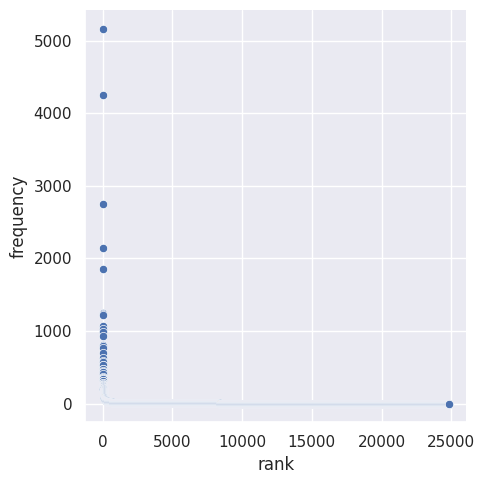

In [5]:
#Drop first row from data frame
df_en.drop(index=df_en.index[0],
        axis=0,
        inplace=True)

#Re-do rank with new elements
df_en['rank'] = list(range(1, len(df_en) + 1))
print(df_en)
sns.relplot(x="rank", y="frequency", data=df_en);
plt.show()
plt.close()

                      word  frequency   rank   logfreq
24                     and       5164      1  8.549660
4                       of       4254      2  8.355850
94                       i       2748      3  7.918992
51                      to       2143      4  7.670429
14                      in       1848      5  7.522400
...                    ...        ...    ...       ...
11839              wicket,          1  24837  0.693147
11840                vane,          1  24838  0.693147
11841                sash,          1  24839  0.693147
11842            work-box,          1  24840  0.693147
24841  ebooks.\r\n\r\n\r\n          1  24841  0.693147

[24841 rows x 4 columns]


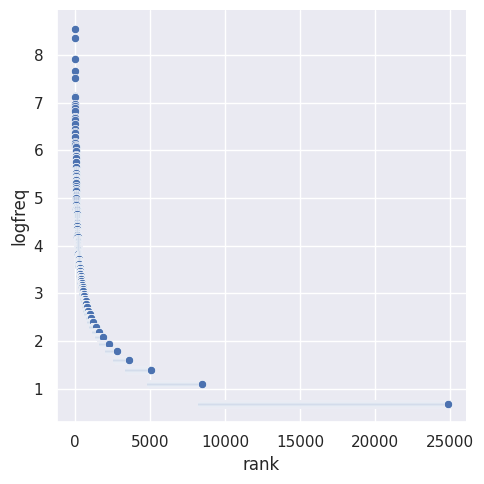

In [6]:
#Log frequencies
df_en['logfreq'] = [log(x+1) for x in df_en['frequency']]
print(df_en)
sns.relplot(x="rank", y="logfreq", data=df_en);
plt.show()
plt.close()

In [7]:
#Arabic poems
#Tokenization
ar_tokenized = poems_ar_text.split(' ')
#Normalize text
filter_out = [""]
normalized_ar = [w for w in ar_tokenized if w not in filter_out and not ("\t\t\t\n" in w)]
print(len(normalized_ar))
#Get most common words
freq_ar = Counter(normalized_ar)
freq_ar.most_common(10)

7345


[('من', 286),
 ('في', 267),
 ('ما', 109),
 ('على', 55),
 ('قد', 52),
 ('عن', 49),
 ('لا', 47),
 ('الله', 40),
 ('كل', 39),
 ('لي', 39)]

In [8]:
#Zipf's law Arabic
sns.set_theme(style="darkgrid")
#Create dataframe to match each word to its frequency
df_ar = pd.DataFrame.from_records(list(dict(Counter(normalized_ar)).items()), columns=['word','frequency'])
print(df_ar)
#Sort values to rank them
df_ar = df_ar.sort_values(by=['frequency'], ascending=False)
df_ar['rank'] = list(range(1, len(df_ar) + 1))
print(df_ar)

                  word  frequency
0                   إن         20
1                   من        286
2                   ضن          1
3              بالكنيف          1
4                  على         55
...                ...        ...
4399      نسبا\r\nإنني          1
4400              غضبة          1
4401  ذنبا\r\r\nوجلادا          1
4402              نشطت          1
4403        عتمه\r\r\n          1

[4404 rows x 2 columns]
              word  frequency  rank
1               من        286     1
16              في        267     2
64              ما        109     3
4              على         55     4
133             قد         52     5
...            ...        ...   ...
1736        أمداحه          1  4400
1739            عي          1  4401
1740  بواح\r\nأيفي          1  4402
1741           شعر          1  4403
4403    عتمه\r\r\n          1  4404

[4404 rows x 3 columns]


              word  frequency  rank
16              في        267     1
64              ما        109     2
4              على         55     3
133             قد         52     4
229             عن         49     5
...            ...        ...   ...
1736        أمداحه          1  4399
1739            عي          1  4400
1740  بواح\r\nأيفي          1  4401
1741           شعر          1  4402
4403    عتمه\r\r\n          1  4403

[4403 rows x 3 columns]


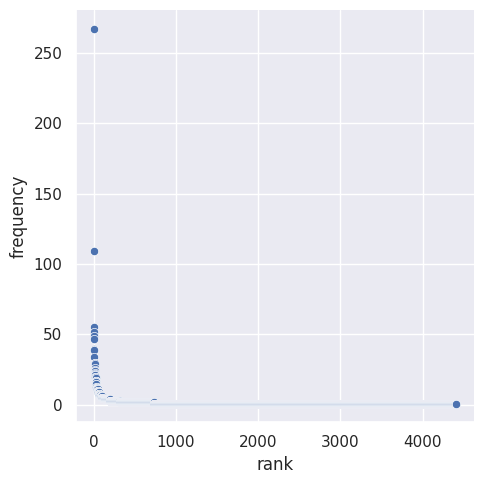

In [9]:
#Drop first row from data frame
df_ar.drop(index=df_ar.index[0],
        axis=0,
        inplace=True)

#Re-do rank with new elements
df_ar['rank'] = list(range(1, len(df_ar) + 1))
print(df_ar)
sns.relplot(x="rank", y="frequency", data=df_ar);
plt.show()
plt.close()

              word  frequency  rank   logfreq
16              في        267     1  5.590987
64              ما        109     2  4.700480
4              على         55     3  4.025352
133             قد         52     4  3.970292
229             عن         49     5  3.912023
...            ...        ...   ...       ...
1736        أمداحه          1  4399  0.693147
1739            عي          1  4400  0.693147
1740  بواح\r\nأيفي          1  4401  0.693147
1741           شعر          1  4402  0.693147
4403    عتمه\r\r\n          1  4403  0.693147

[4403 rows x 4 columns]


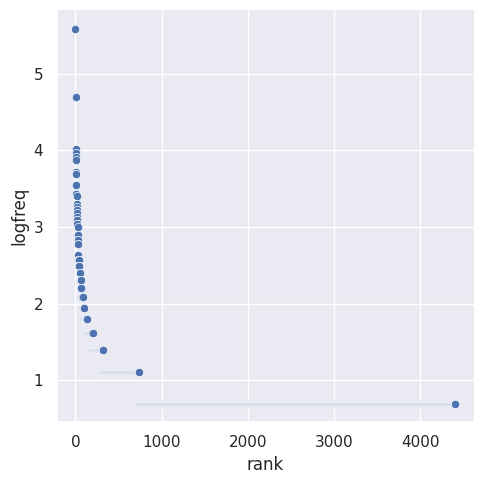

In [10]:
#Log frequencies
df_ar['logfreq'] = [log(x+1) for x in df_ar['frequency']]
print(df_ar)
sns.relplot(x="rank", y="logfreq", data=df_ar);
plt.show()
plt.close()